# Shafiqul Alam Khan

# EE 5323 Digital Image Processing

# Homework #6

# Due Date: 3/31/2023

1. Write Python code without using OpenCV capabilities that convert:

        a. CMY to RGB
        b. HSI to RGB
        c. RGB to YCbCr

## a. CMY to RGB

RGB


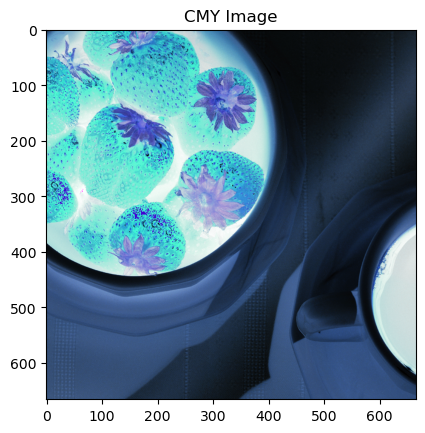

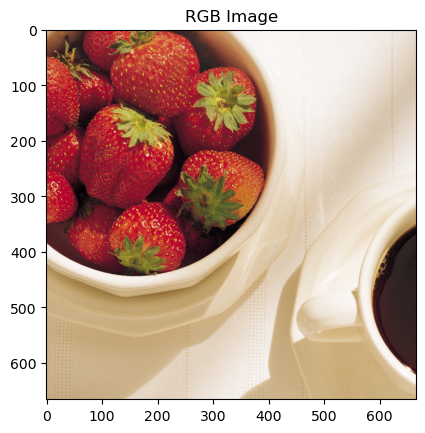

In [4]:
# Importing Libreries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, cos, acos, degrees, radians, pi

# Importing image
im = Image.open(r"strawberries.tif")

# Verifying image mode
print(im.mode)

# Splitting RGB Channels
rgb_img_split = Image.Image.split(im)
R = rgb_img_split[0]
G = rgb_img_split[1]
B = rgb_img_split[2]

# Converting to Numpy Array
R = np.asarray(R)
G = np.asarray(G)
B = np.asarray(B)

# Defining function to convert RGB to CMY
def rgb_to_cmy(R, G, B):
    """Function to convert RGB to CMY"""
    C = 1 - R
    M = 1 - G
    Y = 1 - B
    return (C, M, Y)

# Applying the function
C, M, Y = rgb_to_cmy(R, G, B)

# Combine CMY channels
CMY = np.dstack((C,M,Y))

# Showing the CMY image
plt.imshow(CMY)
plt.title("CMY Image")
plt.show()

# Defining function to convert CMY to RGB
def rgb_to_cmy(C, M, Y):
    """Function to convert RGB to CMY"""
    R = 1 - C
    G = 1 - M
    B = 1 - Y
    return (R, G, B)

# Applying the function
R, G, B = rgb_to_cmy(C, M, Y)

# Combine RGB channels
RGB = np.dstack((R,G,B))

# Showing the RGB image
plt.imshow(RGB)
plt.title("RGB Image")
plt.show()

## b. HSI to RGB

RGB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


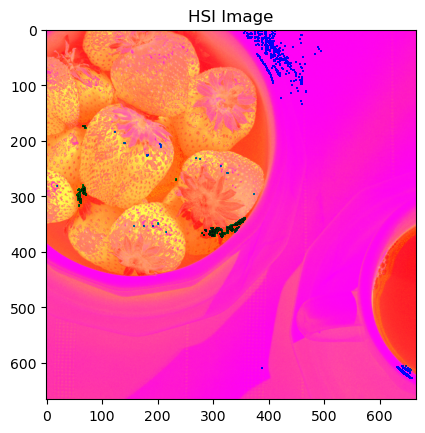

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


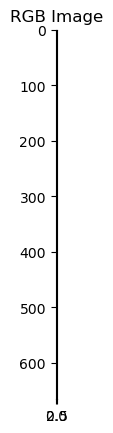

In [10]:
# Importing Libreries
from PIL import Image
from math import sqrt, cos, acos, degrees, radians, pi
import numpy as np
import matplotlib.pyplot as plt

# Importing image
im = Image.open(r"strawberries.tif")

# Verifying image mode
print(im.mode)


# Defining function to convert RGB to HSI
def RGB_TO_HSI(img):

    with np.errstate(divide='ignore', invalid='ignore'):

        #Load image with 32 bit floats as variable type
        bgr = np.float32(img)/255

        #Separate color channels
        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        #Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        #Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation

        #Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    import math
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue

        #Merge channels into picture and return image
        hsi = np.dstack((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
        return hsi

# Applying function to convert RGB image to HSI
im_HSI = RGB_TO_HSI(im)

# Showing the HSI image
plt.imshow(im_HSI)
plt.title("HSI Image")
plt.show()

# Defining function to convert HSI to RGB
def HSI_to_RGB(h, s, i):
    h = h.all()
    if 0 <= h <= 120 :
        b = i * (1 - s)
        r = i * (1 + (s * cos(radians(h)) / cos(radians(60) - radians(h))))
        g = i * 3 - (r + b)
    elif 120 < h <= 240:
        h -= 120
        r = i * (1 - s)
        g = i * (1 + (s * cos(radians(h)) / cos(radians(60) - radians(h))))
        b = 3 * i - (r + g)
    elif 0 < h <= 360:
        h -= 240
        g = i * (1 - s)
        b = i * (1 + (s * cos(radians(h)) / cos(radians(60) - radians(h))))
        r = i * 3 - (g + b)
    return [r, g, b]

# Splitting RGB Channels
H = im_HSI[0]
S = im_HSI[1]
I = im_HSI[2]

R, G, B = HSI_to_RGB(H, S, I)

# Combine RGB channels
RGB = np.dstack((R,G,B))

# Showing the RGB image
plt.imshow(RGB)
plt.title("RGB Image")
plt.show()

## c. RGB to YCbCr

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RGB


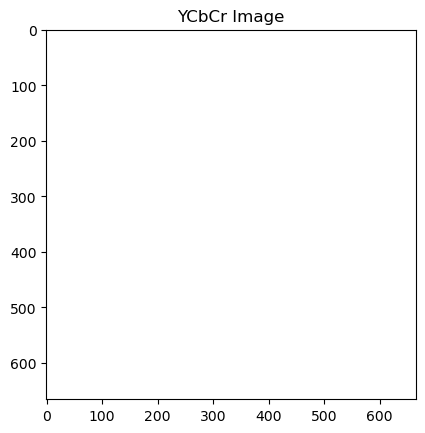

In [11]:
# Importing image
im = Image.open(r"strawberries.tif")

# Verifying image mode
print(im.mode)

# Splitting RGB Channels
rgb_img_split = Image.Image.split(im)
R = rgb_img_split[0]
G = rgb_img_split[1]
B = rgb_img_split[2]

# Converting to Numpy Array
R = np.asarray(R)
G = np.asarray(G)
B = np.asarray(B)

def RGB_to_YCbCr(R, G, B):
    Y = 0.299*R + 0.587*G + 0.114*B
    Cb = -0.1687*R - 0.3313*G + 0.5*B + 128
    Cr = 0.5*R - 0.4187*G - 0.0813*B + 128
    return [Y, Cb, Cr]

Y, Cb, Cr = RGB_to_YCbCr(R, G, B)

# Combine RGB channels
YCbCr = np.dstack((Y, Cb, Cr))

# Showing the YCbCr image
plt.imshow(YCbCr)
plt.title("YCbCr Image")
plt.show()